### Data uploading

In [ ]:
import numpy as np
file_data_path="/Users/Rekha/Downloads/sample.xyz"
point_cloud= np.loadtxt(file_data_path, skiprows=1, max_rows=1000000)
point_cloud[0]
point_cloud[1]
point_cloud[1][3]
np.mean(point_cloud,axis=0)[2]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

point_cloud= np.loadtxt(file_data_path,skiprows=1)
mean_Z=np.mean(point_cloud,axis=0)[2]
spatial_query=point_cloud[abs( point_cloud[:,2]-mean_Z)<1]
xyz=spatial_query[:,:3]
rgb=spatial_query[:,3:]
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = rgb/255, s=0.01)
plt.show()

In [1]:
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#for vizualisation purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
#!pip install -U scikit-learn

In [4]:
data_folder = "/Users/Rekha/Documents/point_cloud_ML"

In [7]:
dataset="/Users/Rekha/Documents/point_cloud_ML/data/3DML_urban_point_cloud.xyz"
result_folder="/Users/Rekha/Documents/point_cloud_ML/results"

In [5]:
data = "/Users/Rekha/Documents/point_cloud_ML/3DML_urban_point_cloud.csv"

In [8]:

#Store in a Pandas dataframe the content of the file on the google drive
pcd=pd.read_csv(dataset,delimiter=' ')
pcd

,X,Y,Z,R,G,B,omnivariance_2,normal_cr_2,ScanDirectionFlag,NumberOfReturns,planarity_2,nb_neighbors_1,Intensity,Classification,omnivariance_1,verticality_1
0,-0.35,7.780000,193.240005,83,88,85,0.068255,0.000660,1.0,2.0,0.395102,4.0,1338.0,1.0,0.002344,0.013035
1,-0.34,8.350000,193.190002,173,164,176,0.064437,0.000567,1.0,1.0,0.444954,4.0,1921.0,1.0,0.014229,0.015639
2,-0.41,8.920000,193.039993,158,158,164,0.071727,0.000864,1.0,1.0,0.420157,5.0,2445.0,1.0,0.017933,0.016346
3,-0.30,9.490000,193.009995,136,136,138,0.078786,0.001038,1.0,1.0,0.349275,4.0,3269.0,1.0,0.006866,0.004476
4,-0.31,10.520000,193.000000,194,185,198,0.029530,0.000065,1.0,2.0,0.491427,4.0,1688.0,1.0,0.002832,0.005706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612124,-39.66,983.429993,202.850006,214,226,238,0.105032,0.000864,0.0,2.0,0.851765,7.0,627.0,3.0,0.051912,0.112306
3612125,-22.58,587.150024,189.729996,68,65,44,0.161776,0.002411,0.0,1.0,0.836145,9.0,1922.0,3.0,0.052564,0.015288
3612126,-16.52,586.570007,189.740005,42,51,44,0.461649,0.082355,0.0,2.0,0.637373,6.0,1689.0,3.0,0.030623,0.001556
3612127,-15.07,587.299988,189.759995,52,70,56,0.587114,0.106482,0.0,1.0,0.356182,4.0,2467.0,3.0,0.095947,0.701525


In [9]:
pcd.dropna(inplace= True)

In [16]:
### Point Cloud Feature Selection and Preparation

In [10]:
#Create training and testing
labels=pcd['Classification']
features=pcd[['X','Y','Z','R','G','B']]
features_scaled = MinMaxScaler().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4)

In [11]:

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

C:\Users\Rekha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

In [12]:
#No, scaling is not necessary for random forests. The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regressio, as well as neural networks, aren't so important
rf_classifier = RandomForestClassifier(n_estimators=10)
#The line below is useful only if you want to create a classification model
rf_classifier.fit(X_train,y_train)
#The line below is useful only if you want to test on an unseen dataset(real scenario)
rf_predictions = rf_classifier.predict(X_test)
print(classification_report(y_test,rf_predictions, target_names=['ground','vegetation','buildings']))


              precision    recall  f1-score   support

      ground       0.99      1.00      1.00    690694
  vegetation       0.97      0.98      0.98    427355
   buildings       0.97      0.94      0.96    233742

    accuracy                           0.98   1351791
   macro avg       0.98      0.97      0.98   1351791
weighted avg       0.98      0.98      0.98   1351791



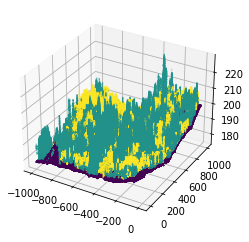

In [14]:
#plotting the results 3D
ax = plt.axes(projection='3d')
ax.scatter(X_test['X'],X_test['Y'],X_test['Z'], c=rf_predictions,s=0.1)

C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

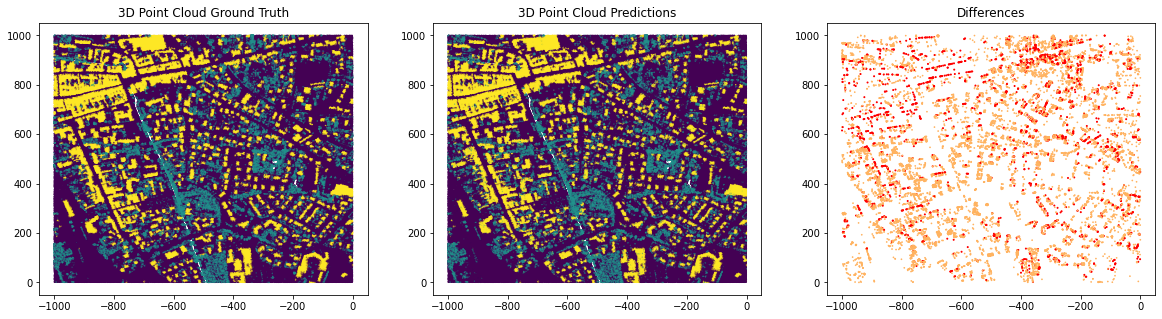

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-rf_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-rf_predictions))
axs[2].set_title('Differences')

### 3D Machine Learning Tuning

              precision    recall  f1-score   support

      ground       0.92      0.90      0.91    690694
  vegetation       0.88      0.91      0.90    427355
   buildings       0.92      0.92      0.92    233742

    accuracy                           0.91   1351791
   macro avg       0.91      0.91      0.91   1351791
weighted avg       0.91      0.91      0.91   1351791



C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

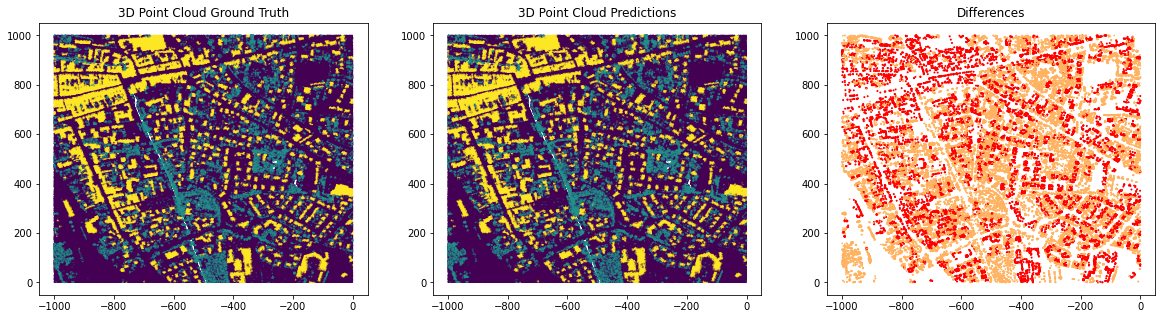

In [16]:
#Example of a K-Nearest Neighbors Model for 3D Point Cloud Semantic Segmentation
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = knn_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-knn_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-knn_predictions))
axs[2].set_title('Differences')


In [17]:
#Example of a Multi-Layer Perception Model for 3D Point Cloud Semantic Segmentation

C:\Users\Rekha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

      ground       0.63      0.75      0.69    690694
  vegetation       0.69      0.74      0.72    427355
   buildings       0.49      0.15      0.22    233742

    accuracy                           0.64   1351791
   macro avg       0.61      0.55      0.54   1351791
weighted avg       0.63      0.64      0.62   1351791



C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

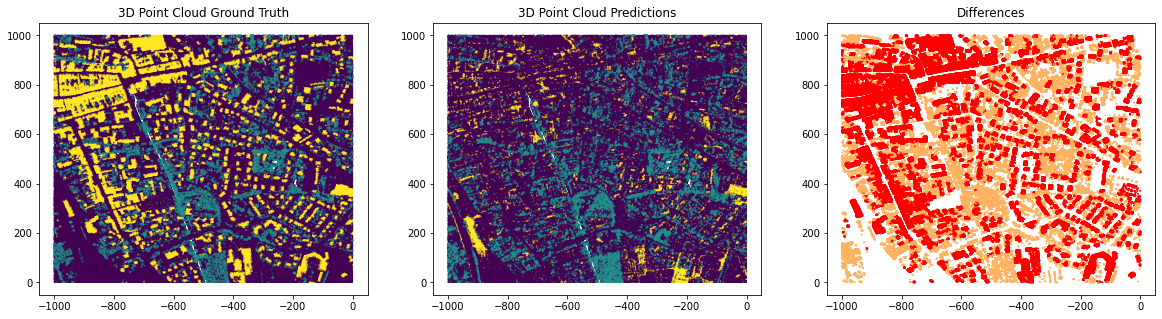

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print(classification_report(y_test, mlp_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = mlp_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-mlp_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-mlp_predictions))
axs[2].set_title('Differences')

### 3D Machine Learning Performance

In [31]:
val_dataset ="/Users/Rekha/Documents/point_cloud_ML/data/3DML_validation.xyz"


In [33]:
val_pcd=pd.read_csv(val_dataset,delimiter=' ')


In [34]:
val_pcd 

,X,Y,Z,R,G,B,ScanDirectionFlag,NumberOfReturns,Intensity,Classification,normal_cr_2,omnivariance_2,planarity_2,nb_neighbors_1,omnivariance_1,verticality_1
0,-433.220001,999.640015,197.640015,93,96,90,1.0,1.0,10146.0,1.0,0.136220,0.465878,0.174196,5.0,0.068288,0.105956
1,-124.369995,999.500000,195.750000,53,61,52,1.0,2.0,1779.0,1.0,NaN,0.087035,0.323528,1.0,NaN,NaN
2,-865.359985,999.460022,220.769989,169,158,149,1.0,1.0,10724.0,1.0,0.105720,0.313781,0.172743,3.0,NaN,NaN
3,-858.210022,999.630005,220.709991,197,188,175,1.0,1.0,10362.0,1.0,0.020477,0.140409,0.536379,5.0,0.021020,0.003914
4,-970.690002,962.590027,240.950012,43,77,83,1.0,1.0,1206.0,1.0,0.006123,0.242020,0.774213,5.0,0.030113,0.000915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622941,-0.179993,125.440002,176.459991,104,106,98,1.0,1.0,4833.0,3.0,0.122037,0.428064,0.356472,4.0,0.050842,0.519743
3622942,-0.010010,127.390015,176.489990,94,97,92,1.0,2.0,1132.0,3.0,0.069844,0.399165,0.295284,2.0,NaN,NaN
3622943,-0.090027,107.799988,162.320007,60,63,66,1.0,1.0,2974.0,3.0,0.180561,0.459054,0.022629,3.0,NaN,NaN
3622944,-0.020020,125.469971,176.940002,98,101,94,1.0,2.0,1286.0,3.0,0.088075,0.382293,0.313492,4.0,0.050842,0.519743


In [40]:
val_pcd.dropna(inplace= True)

In [36]:
val_labels=val_pcd['Classification']
val_features=val_pcd[['X','Y','Z','R','G','B']]
val_predictions = rf_classifier.predict(val_features)
print(classification_report(val_labels, val_predictions, target_names=['ground','vegetation','buildings']))

              precision    recall  f1-score   support

      ground       0.44      0.52      0.48   1278277
  vegetation       0.59      0.51      0.55   1593147
   buildings       0.46      0.44      0.45    751522

    accuracy                           0.50   3622946
   macro avg       0.50      0.49      0.49   3622946
weighted avg       0.51      0.50      0.50   3622946



C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

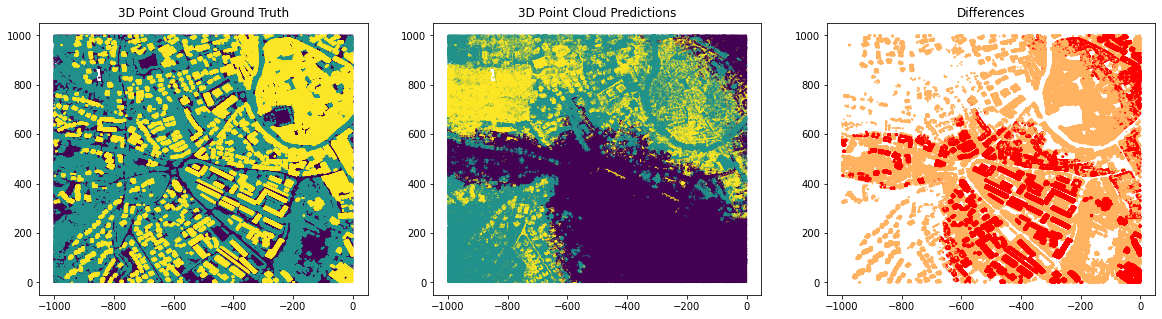

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(val_features['X'], val_features['Y'], c =val_labels, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_features['X'], val_features['Y'], c = val_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_features['X'], val_features['Y'], c = val_labels-val_predictions, cmap = plt.cm.rainbow, s=0.5*(val_labels-val_predictions))
axs[2].set_title('Differences')

              precision    recall  f1-score   support

      ground       0.97      0.98      0.98    691151
  vegetation       0.97      0.98      0.97    427933
   buildings       0.95      0.91      0.93    232707

    accuracy                           0.97   1351791
   macro avg       0.96      0.96      0.96   1351791
weighted avg       0.97      0.97      0.97   1351791

              precision    recall  f1-score   support

      ground       0.90      0.81      0.85   1188768
  vegetation       0.92      0.92      0.92   1315231
   buildings       0.68      0.81      0.74    613317

    accuracy                           0.86   3117316
   macro avg       0.83      0.85      0.84   3117316
weighted avg       0.86      0.86      0.86   3117316



C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

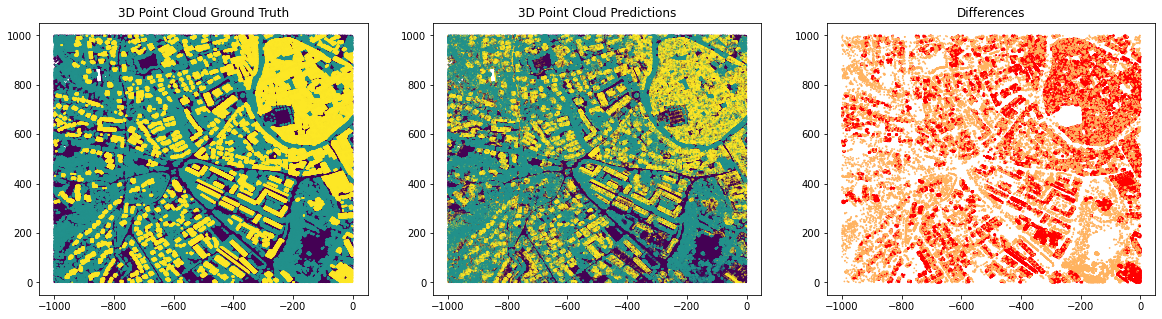

In [41]:
labels=pcd['Classification']
features=pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
features_scaled = MinMaxScaler().fit_transform(features)

val_labels=val_pcd['Classification']
val_features=val_pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
val_features_scaled = MinMaxScaler().fit_transform(val_features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.4)
rf_classifier = RandomForestClassifier(n_estimators = 10)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, rf_predictions, target_names=['ground','vegetation','buildings']))

val_rf_predictions = rf_classifier.predict(val_features_scaled)
print(classification_report(val_labels, val_rf_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(val_pcd['X'], val_pcd['Y'], c =val_labels, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_pcd['X'], val_pcd['Y'], c = val_rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_pcd['X'], val_pcd['Y'], c = val_labels-val_rf_predictions, cmap = plt.cm.rainbow, s=0.5*(val_labels-val_rf_predictions))
axs[2].set_title('Differences')

              precision    recall  f1-score   support

      ground       0.97      0.98      0.97    737967
  vegetation       0.97      0.97      0.97    480504
   buildings       0.94      0.90      0.92    258013

    accuracy                           0.96   1476484
   macro avg       0.96      0.95      0.95   1476484
weighted avg       0.96      0.96      0.96   1476484

              precision    recall  f1-score   support

      ground       0.88      0.92      0.90   1069661
  vegetation       0.93      0.94      0.94   1183840
   buildings       0.88      0.79      0.83    552084

    accuracy                           0.90   2805585
   macro avg       0.90      0.88      0.89   2805585
weighted avg       0.90      0.90      0.90   2805585

              precision    recall  f1-score   support

      ground       0.89      0.92      0.90   1188768
  vegetation       0.93      0.95      0.94   1315231
   buildings       0.88      0.79      0.83    613317

    accuracy        

C:\Users\Rekha\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

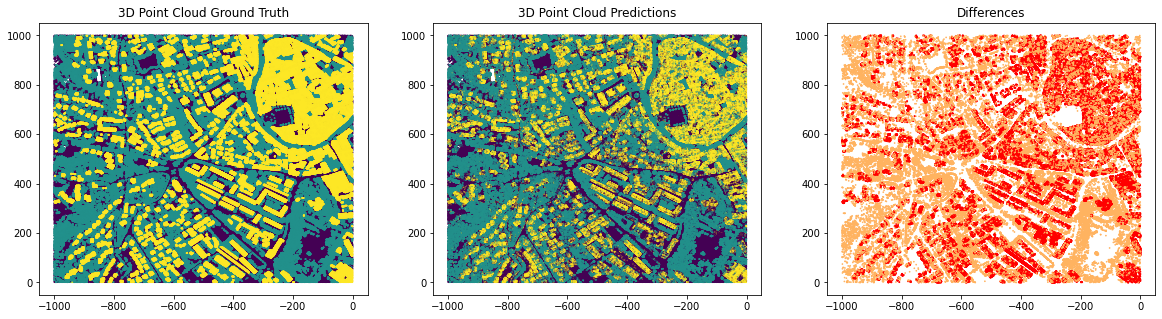

In [42]:
val_labels=val_pcd['Classification']
val_features=val_pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
val_features_sampled, val_features_test, val_labels_sampled, val_labels_test = train_test_split(val_features, val_labels, test_size=0.9)
val_features_scaled_sample = MinMaxScaler().fit_transform(val_features_test)

labels=pd.concat([pcd['Classification'],val_labels_sampled])
features=pd.concat([pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']],val_features_sampled])
features_scaled = MinMaxScaler().fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.4)
rf_classifier = RandomForestClassifier(n_estimators = 10)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_predictions, target_names=['ground','vegetation','buildings']))


val_rf_predictions_90 = rf_classifier.predict(val_features_scaled_sample)
print(classification_report(val_labels_test, val_rf_predictions_90, target_names=['ground','vegetation','buildings']))


val_features_scaled = MinMaxScaler().fit_transform(val_features)
val_rf_predictions = rf_classifier.predict(val_features_scaled)
print(classification_report(val_labels, val_rf_predictions, target_names=['ground','vegetation','buildings']))

# val_pcd['predictions']=val_rf_predictions
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(val_pcd['X'], val_pcd['Y'], c =val_pcd['Classification'], s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_pcd['X'], val_pcd['Y'], c = val_rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_pcd['X'], val_pcd['Y'], c = val_pcd['Classification']-val_rf_predictions, cmap = plt.cm.rainbow, s=0.5*(val_pcd['Classification']-val_rf_predictions))
axs[2].set_title('Differences')